# 1. Business Understanding
In this project, I am be exploring the data provided by Udacity Stack Overflow Data - 2017 Survey results in order to find answers to some of the questions listed below.

Here I am trying to find answers to the below 3 questions: 

1. What are the most common languages, technologies, methodologies and technologies used by professionals
2. What is the average salary for each programming language
3. Which programming language has the highest job satisfaction

# 2. Data Understanding

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv(r"C:\Users\Latha.Selvaraj\Desktop\Desktop\Udacity\Write a blogpost\survey_results_public.csv")

In [11]:
schema = pd.read_csv(r"C:\Users\Latha.Selvaraj\Desktop\Desktop\Udacity\Write a blogpost\survey_results_schema.csv")

In [14]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

## Question 1: What are the most common languages, technologies, methodologies and tools used by professionals

# 3. Prepare Data

Data prepation is done by selecting the desired fields and rows which shows if the professional developer has participated in the survey.

All rows with only Professional developers are selected and other rows are dropped. This will also elimintate NAN and Categorial values

In [17]:
q1 = df[['Professional', 'HaveWorkedLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase', 'Methodology']]
q1 = q1[q1.Professional == "Professional developer"]
q1.head()

,Professional,HaveWorkedLanguage,HaveWorkedFramework,HaveWorkedDatabase,Methodology
2,Professional developer,Java; PHP; Python,NaN,MySQL,Agile; Lean; Scrum; Extreme; Pair; Kanban
4,Professional developer,NaN,NaN,NaN,NaN
7,Professional developer,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,React,Redis; MySQL; PostgreSQL,Agile; Pair; Kanban
8,Professional developer,C#; JavaScript,AngularJS; Node.js; .NET Core,SQL Server,Agile; Scrum; Pair; Kanban; Domain-driven design
9,Professional developer,Objective-C; Swift,NaN,PostgreSQL,Agile; Scrum; Pair; Kanban


# 4. Data Modelling

### The most commonly used languages are:

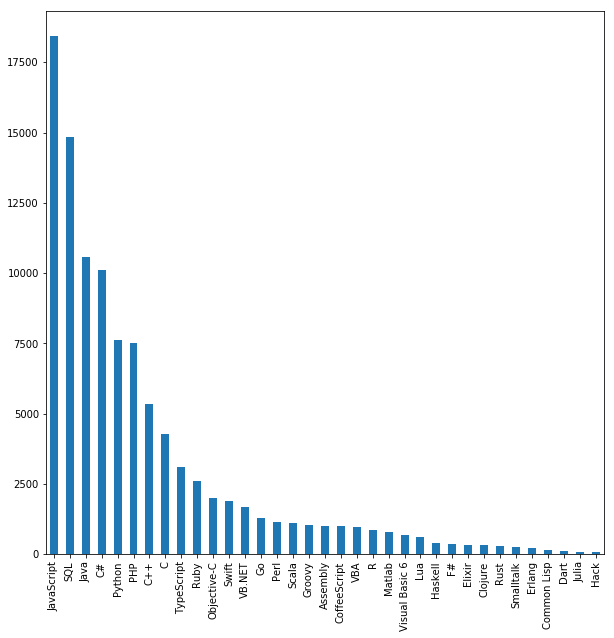

In [19]:
languages = q1['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()

plt.figure(figsize=(10,10))
languages.plot(kind="bar")

plt.savefig('languages')

### The most commonly used frameworks are:

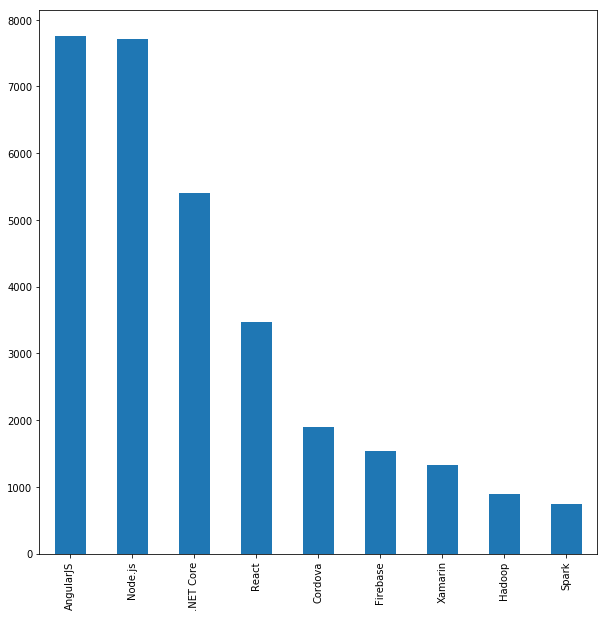

In [21]:
frameworks = q1['HaveWorkedFramework'].str.split('; ', expand=True).stack().value_counts()

plt.figure(figsize=(10,10))
frameworks.plot(kind="bar")

plt.savefig('frameworks')

### The most commonly used databases are:

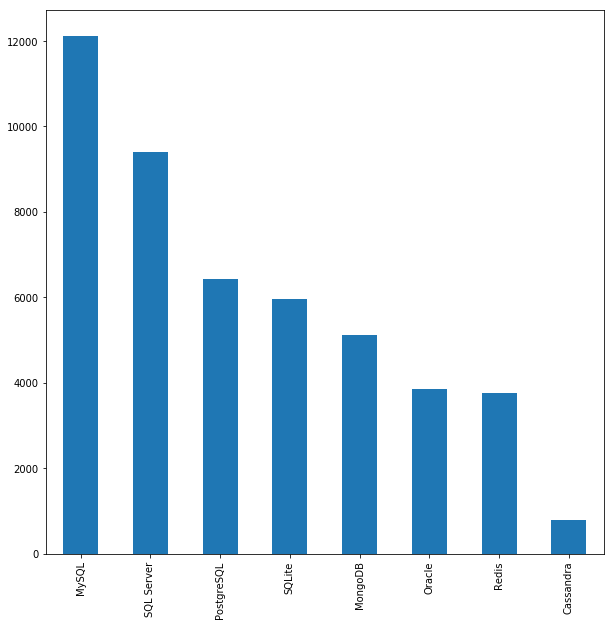

In [23]:
databases = q1['HaveWorkedDatabase'].str.split('; ', expand=True).stack().value_counts()

plt.figure(figsize=(10,10))
databases.plot(kind="bar")

plt.savefig('databases')

### The most commonly used methodologies are

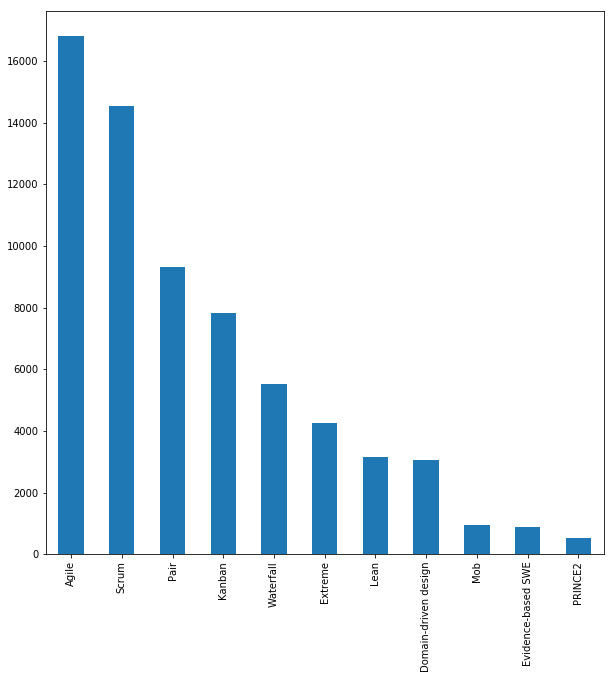

In [24]:
methodologies = q1['Methodology'].str.split('; ', expand=True).stack().value_counts()

plt.figure(figsize=(10,10))
methodologies.plot(kind="bar")

plt.savefig('methodologies')

# 5. Evaluate the results

### Evaluating the results for Question 1 above:
The top 5 most commonly used languages are found to be Javascript, SQL, Java, C#, Python. To support this the most commonly used framework
is also Java based skills. The most commonly used databases are SQL based and the most common methodology is Agile and Scrum.


## Question 2: What is the average salary for each programming language? 

The data will be prepared here by selecting the desired columns and only using the rows where a professional devloper was taking the survey as we did earlier. All rows were dropped where the Professional column did not equal "Professional Developer" as I am considering only Professional Developers here.If the row had Salary or HaveWorkedLanguage as Nan then the row would be dropped.

In [26]:
q2 = df[['Professional', 'HaveWorkedLanguage', 'Salary']]

q2 = q2[q2.Professional == "Professional developer"]
q2 = q2.drop('Professional', 1)
q2 = q2.dropna(subset=['Salary', 'HaveWorkedLanguage'], axis=0)
q2.head()

,HaveWorkedLanguage,Salary
2,Java; PHP; Python,113750.0
14,Assembly; C; C++,100000.0
17,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.0
22,Java,100764.0
25,Java; Scala,175000.0


In [27]:
def split_column(column_to_split, delimeter, column_to_store, df):
    split_col = pd.DataFrame(columns = [column_to_split, column_to_store])
    for index, row in df.iterrows():
        columns = row[column_to_split].split(delimeter)
        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_to_store]]
    return split_col

In [28]:
split_languages = split_column("HaveWorkedLanguage", "; ", "Salary", q2)
split_languages.head()

,HaveWorkedLanguage,Salary
0,Java,113750.0
1,PHP,113750.0
2,Python,113750.0
3,Assembly,100000.0
4,C,100000.0


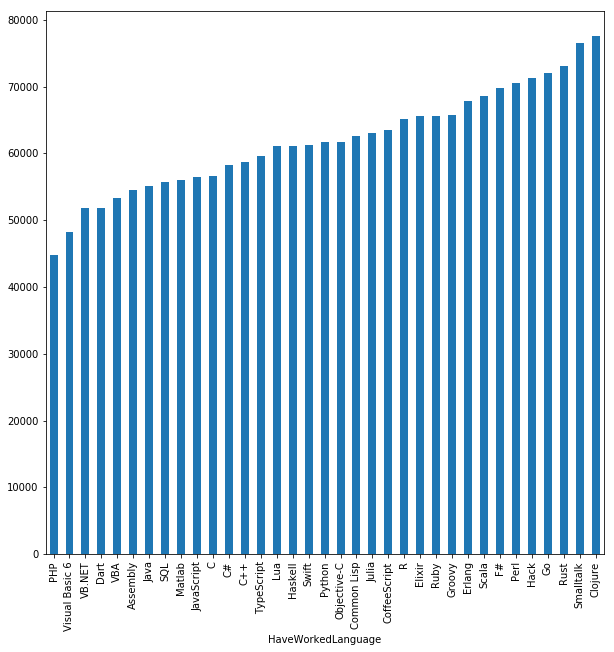

In [29]:
q2_answer = split_languages.groupby(['HaveWorkedLanguage']).mean()['Salary'].sort_values()
plt.figure(figsize=(10,10))
q2_answer.plot(kind = 'bar')
plt.savefig('q2')

### Evaluating the results for Question 2 above:

As we can see from this bar chart, the average salaries for each language ranges from mid 40,000 to over 80,000. 
Its interesting to see that the most common languages that we found in the last section are of a lower salary expectation 
and the least popular languages have higher average salaries. 
This could be because if less resouces are available in the market for a langugae then the salary and demand will also be high.

## Question 3: Which programming language has the highest job satisfaction

Lets prepare a data necessary to answer the above question. Just like the earlier sections we will eliminate the NAN and rows.

In [31]:
q3 = df[['Professional', 'HaveWorkedLanguage', 'JobSatisfaction']]

q3 = q3[q3.Professional == "Professional developer"]
q3 = q3.drop('Professional', 1)
q3 = q3.dropna(subset=['JobSatisfaction', 'HaveWorkedLanguage'], axis=0)
q3.head()

,HaveWorkedLanguage,JobSatisfaction
2,Java; PHP; Python,9.0
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,7.0
8,C#; JavaScript,6.0
9,Objective-C; Swift,8.0
13,Java; JavaScript; Ruby; SQL,6.0


In [ ]:
split_languages_q3 = split_column("HaveWorkedLanguage", "; ", "JobSatisfaction", q3)

In [33]:
q3_answer = split_languages_q3.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values()
q3_answer.head(50)

HaveWorkedLanguage
Visual Basic 6    6.899110
VB.NET            6.901878
Common Lisp       6.907143
Haskell           6.918768
Hack              6.969231
Java              6.984875
Matlab            6.988204
SQL               7.000276
Rust              7.003745
Julia             7.015152
C#                7.019202
PHP               7.023412
F#                7.030641
C                 7.037010
R                 7.043317
Dart              7.048544
Clojure           7.049020
JavaScript        7.062319
VBA               7.063559
C++               7.072574
Assembly          7.083074
Erlang            7.086538
Groovy            7.102786
Perl              7.104779
Python            7.114650
Lua               7.159933
Go                7.164094
Scala             7.192627
Ruby              7.216344
Swift             7.217698
TypeScript        7.229228
CoffeeScript      7.251020
Elixir            7.307190
Objective-C       7.317123
Smalltalk         7.461864
Name: JobSatisfaction, dtype: float6

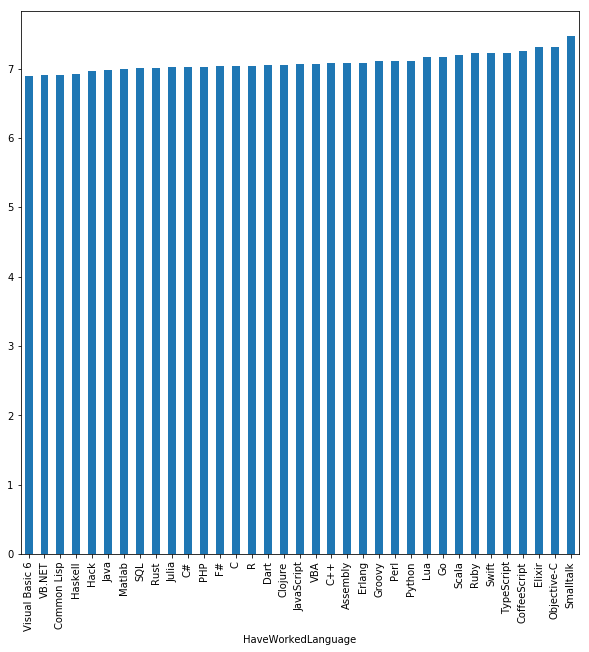

In [34]:
plt.figure(figsize=(10,10))
q3_answer.plot(kind = 'bar')
plt.savefig('q3')

### Evaluating the results for Question 3 above:
There is a similar curve here to correlation between languages and salaries. While this could mean that those with more specialised skill sets feel that they are more valuable and therefore are more satisfied with their jobs, it could simply be that those who are paid more are more satisfied.